<a href="https://colab.research.google.com/github/yashveersinghsohi/Car_Price_Prediction/blob/master/Feature_Engineering/CarPrice_02_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Data

In [2]:
root_dir = "https://raw.githubusercontent.com/yashveersinghsohi/Car_Price_Prediction/master/Data/EDA_Data/"

train_features_path = root_dir + "train_features.csv"
train_targets_path = root_dir + "train_targets.csv"

val_features_path = root_dir + "val_features.csv"
val_targets_path = root_dir + "val_targets.csv"

test_features_path = root_dir + "test_features.csv"
test_targets_path = root_dir + "test_targets.csv"

In [3]:
train_features = pd.read_csv(train_features_path)
train_targets = pd.read_csv(train_targets_path)

val_features = pd.read_csv(val_features_path)
val_targets = pd.read_csv(val_targets_path)

test_features = pd.read_csv(test_features_path)
test_targets = pd.read_csv(test_targets_path)

print(f"Train Features: {train_features.shape}")
print(f"Train Targets: {train_targets.shape}", end="\n\n")

print(f"Validation Features: {val_features.shape}")
print(f"Validation Targets: {val_targets.shape}", end="\n\n")

print(f"Test Features: {test_features.shape}")
print(f"Test Targets: {test_targets.shape}", end="\n\n")

Train Features: (13850, 16)
Train Targets: (13850, 1)

Validation Features: (3463, 16)
Validation Targets: (3463, 1)

Test Features: (1924, 16)
Test Targets: (1924, 1)



In [4]:
num_features = ["Prod. year", "Cylinders", "Airbags"]
obj_features = ["Levy", "Manufacturer", "Model", 
                "Category", "Leather interior", 
                "Fuel type", "Engine volume", "Mileage", 
                "Gear box type", "Drive wheels", "Doors", 
                "Wheel", "Color"]
target_features = ["Price"]

# Feature Engineering

In [5]:
train_features_df = pd.DataFrame()
val_features_df = pd.DataFrame()

## Numeric Features

### Prod. year

- `prod_year`: Copy of `Prod. year` column
- `prod_year_delta`: Difference in years from the year `2020` (max `Prod. year` in train set)

In [6]:
# Training features
train_features_df["prod_year"] = train_features["Prod. year"]
train_features_df["prod_year_delta"] = (train_features["Prod. year"] - train_features["Prod. year"].max()).abs()

# Validation features
val_features_df["prod_year"] = val_features["Prod. year"]
val_features_df["prod_year_delta"] = (val_features["Prod. year"] - train_features["Prod. year"].max()).abs()

- `prod_year_delta_sq`: Square of `prod_year_delta`
- `prod_year_delta_cu`: Cube of `prod_year_delta`

In [7]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)

# Training Features
train_poly_features = poly_features.fit_transform(train_features_df[["prod_year_delta"]])
train_features_df["prod_year_delta_sq"] = train_poly_features[:, 1]
train_features_df["prod_year_delta_cu"] = train_poly_features[:, 2]

# Validation features
val_poly_features = poly_features.transform(val_features_df[["prod_year_delta"]])
val_features_df["prod_year_delta_sq"] = val_poly_features[:, 1]
val_features_df["prod_year_delta_cu"] = val_poly_features[:, 2]

- `prod_year_new`: Defines how new the car is based on the `Prod. year` feature.
  - `prod_year_new = 1` means `prod_year < 1 year`
  - `prod_year_new = 2` means `1 <= prod_year < 4`
  - `prod_year_new = 3` means `4 <= prod_year < 6`
  - `prod_year_new = 4` means `6 <= prod_year < 8`
  - `prod_year_new = 5` means `8 <= prod_year < 10` 
  - `prod_year_new = 6` means `prod_year >= 10 years`

In [8]:
# Training features
train_features_df["prod_year_new"] = np.where(
    train_features_df["prod_year_delta"]<1, 
    1, 0
  )

train_features_df["prod_year_new"] = np.where(
    (train_features_df["prod_year_delta"]<4) & (train_features_df["prod_year_delta"]>=1), 
    2, train_features_df["prod_year_new"]
  )

train_features_df["prod_year_new"] = np.where(
    (train_features_df["prod_year_delta"]<6) & (train_features_df["prod_year_delta"]>=4), 
    3, train_features_df["prod_year_new"]
  )

train_features_df["prod_year_new"] = np.where(
    (train_features_df["prod_year_delta"]<8) & (train_features_df["prod_year_delta"]>=6), 
    4, train_features_df["prod_year_new"]
  )

train_features_df["prod_year_new"] = np.where(
    (train_features_df["prod_year_delta"]<10) & (train_features_df["prod_year_delta"]>=8), 
    5, train_features_df["prod_year_new"]
  )

train_features_df["prod_year_new"] = np.where(
    train_features_df["prod_year_delta"]>=10, 
    6, train_features_df["prod_year_new"]
  )

In [9]:
# Validation features
val_features_df["prod_year_new"] = np.where(
    val_features_df["prod_year_delta"]<1, 
    1, 0
  )

val_features_df["prod_year_new"] = np.where(
    (val_features_df["prod_year_delta"]<4) & (val_features_df["prod_year_delta"]>=1), 
    2, val_features_df["prod_year_new"]
  )

val_features_df["prod_year_new"] = np.where(
    (val_features_df["prod_year_delta"]<6) & (val_features_df["prod_year_delta"]>=4), 
    3, val_features_df["prod_year_new"]
  )

val_features_df["prod_year_new"] = np.where(
    (val_features_df["prod_year_delta"]<8) & (val_features_df["prod_year_delta"]>=6), 
    4, val_features_df["prod_year_new"]
  )

val_features_df["prod_year_new"] = np.where(
    (val_features_df["prod_year_delta"]<10) & (val_features_df["prod_year_delta"]>=8), 
    5, val_features_df["prod_year_new"]
  )

val_features_df["prod_year_new"] = np.where(
    val_features_df["prod_year_delta"]>=10, 
    6, val_features_df["prod_year_new"]
  )

### Cylinders

- `cylinders`: `Cylinders` type-casted as `int`

In [10]:
# Training
train_features_df["cylinders"] = train_features["Cylinders"].astype(np.int)

# Validation
val_features_df["cylinders"] = val_features["Cylinders"].astype(np.int)

### Airbags

- `airbags`: `Airbags` type-casted as `int`

In [11]:
# Train
train_features_df["airbags"] = train_features["Airbags"].astype(np.int)

# Val
val_features_df["airbags"] = val_features["Airbags"].astype(np.int)

## Object Features

### Levy

- `levy`:
  - Copy of `Levy` column
  - Replace `"-"` in `Levy` with `np.nan`
  - Convert column to data type: `np.float`
  - Fill null values with median

In [12]:
# Train
train_features_df["levy"] = train_features["Levy"].replace(
    to_replace="-", 
    value=np.nan
  ).astype(np.float)
train_features_df["levy"] = train_features_df["levy"].fillna(
    train_features_df["levy"].median()
  )

# Val
val_features_df["levy"] = val_features["Levy"].replace(
    to_replace="-", 
    value=np.nan
  ).astype(np.float)
val_features_df["levy"] = val_features_df["levy"].fillna(
    train_features_df["levy"].median()
  )

### Manufacturer

- `manufacturer_class`:
  - `= 0`: Unknown Manufacturer 
  - `= 1`: Manufacturer from `class_1` list
  - `= 2`: Manufacturer from `class_2` list
  - `= 3`: Manufacturer from `class_3` list
  - `= 4`: Manufacturer from `class_4` list

In [13]:
class_1 = ['ROLLS-ROYCE', 'MOSKVICH', 'ROVER', 'GMC', 'ACURA', 'VAZ', 'ZAZ', 
           'BUICK', 'UAZ', 'SEAT', 'DAIHATSU', 'OPEL', 'CHRYSLER', 'GAZ', 
           'DAEWOO', 'LEXUS', 'PONTIAC', 'MAZDA', 'AUDI', 'VOLVO', 'ISUZU', 
           'PEUGEOT', 'NISSAN', 'SUBARU', 'ALFA ROMEO', 'SUZUKI', 'MITSUBISHI', 
           'DODGE', 'HONDA', 'GREATWALL']
class_2 = ['RENAULT', 'MERCEDES-BENZ', 'VOLKSWAGEN', 'SKODA', 
           'FIAT', 'TOYOTA', 'CADILLAC', 'FORD', 'CHEVROLET', 'BMW', 'JAGUAR',
           'LINCOLN', 'MERCURY', 'CITROEN', 'SCION', 'KIA', 'სხვა', 'HYUNDAI',
           'MINI', 'INFINITI']
class_3 = ['PORSCHE', 'MASERATI', 'JEEP', 'LAND ROVER', 'SSANGYONG', 'FERRARI']
class_4 = ['HUMMER', 'TESLA', 'ASTON MARTIN']

In [14]:
# Train
train_features_df["manufacturer_class"] = np.where(
    train_features["Manufacturer"].isin(class_1), 
    1, 0
  )

train_features_df["manufacturer_class"] = np.where(
    train_features["Manufacturer"].isin(class_2), 
    2, train_features_df["manufacturer_class"]
  )

train_features_df["manufacturer_class"] = np.where(
    train_features["Manufacturer"].isin(class_3), 
    3, train_features_df["manufacturer_class"]
  )

train_features_df["manufacturer_class"] = np.where(
    train_features["Manufacturer"].isin(class_4), 
    4, train_features_df["manufacturer_class"]
  )

In [15]:
# Val
val_features_df["manufacturer_class"] = np.where(
    val_features["Manufacturer"].isin(class_1), 
    1, 0
  )

val_features_df["manufacturer_class"] = np.where(
    val_features["Manufacturer"].isin(class_2), 
    2, val_features_df["manufacturer_class"]
  )

val_features_df["manufacturer_class"] = np.where(
    val_features["Manufacturer"].isin(class_3), 
    3, val_features_df["manufacturer_class"]
  )

val_features_df["manufacturer_class"] = np.where(
    val_features["Manufacturer"].isin(class_4), 
    4, val_features_df["manufacturer_class"]
  )

- `manufacturer_mean_le`: Label encoding `Manufacturer` according to mean `Price`

In [16]:
temp_df = pd.DataFrame()
temp_df["Manufacturer"] = train_features["Manufacturer"]
temp_df["Price"] = train_targets["Price"]

mean_order = temp_df.groupby(by="Manufacturer")["Price"].mean().index
mean_map = {label: idx for idx, label in enumerate(mean_order)}

# Train
train_features_df["manufacturer_mean_le"] = train_features["Manufacturer"].map(mean_map)

# Val
val_features_df["manufacturer_mean_le"] = val_features["Manufacturer"].map(mean_map).fillna(-1).astype(np.int)

- `manufacturer_median_le`: Label encoding `Manufacturer` according to median `Price`

In [17]:
temp_df = pd.DataFrame()
temp_df["Manufacturer"] = train_features["Manufacturer"]
temp_df["Price"] = train_targets["Price"]

median_order = temp_df.groupby(by="Manufacturer")["Price"].median().index
median_map = {label: idx for idx, label in enumerate(median_order)}

# Train
train_features_df["manufacturer_median_le"] = train_features["Manufacturer"].map(median_map).astype(np.int)

# Val
val_features_df["manufacturer_median_le"] = val_features["Manufacturer"].map(median_map).fillna(-1).astype(np.int)

### Model

Too many categories to be useful. Droping this

### Category

- `category_mean_le`: Label encoding `Category` according to mean `Price`

In [18]:
temp_df = pd.DataFrame()
temp_df["Category"] = train_features["Category"]
temp_df["Price"] = train_targets["Price"]

mean_order = temp_df.groupby(by="Category")["Price"].mean().index
mean_map = {label: idx for idx, label in enumerate(mean_order)}

# Train
train_features_df["category_mean_le"] = train_features["Category"].map(mean_map)

# Val
val_features_df["category_mean_le"] = val_features["Category"].map(mean_map).fillna(-1).astype(np.int)

- `category_median_le`: Label encoding `Category` according to median `Price`

In [19]:
temp_df = pd.DataFrame()
temp_df["Category"] = train_features["Category"]
temp_df["Price"] = train_targets["Price"]

median_order = temp_df.groupby(by="Category")["Price"].median().index
median_map = {label: idx for idx, label in enumerate(median_order)}

# Train
train_features_df["category_median_le"] = train_features["Category"].map(median_map)

# Val
val_features_df["category_median_le"] = val_features["Category"].map(median_map).fillna(-1).astype(np.int)

### Leather interior

- `leather_interior`: 
  - `= 1` when `Leather interior = "Yes"`
  - `= 0` when `Leather interior = "No"`

In [20]:
# Train
train_features_df["leather_interior"] = np.where(
    train_features["Leather interior"]=="Yes", 
    1, 0
  )

# Val
val_features_df["leather_interior"] = np.where(
    val_features["Leather interior"]=="Yes", 
    1, 0
  )

### Fuel type

- `fuel_type_mean_le`: Label encoding `Fuel type` according to mean `Price`

In [21]:
temp_df = pd.DataFrame()
temp_df["Fuel type"] = train_features["Fuel type"]
temp_df["Price"] = train_targets["Price"]

mean_order = temp_df.groupby(by="Fuel type")["Price"].mean().index
mean_map = {label: idx for idx, label in enumerate(mean_order)}

# Train
train_features_df["fuel_type_mean_le"] = train_features["Fuel type"].map(mean_map)

# Val
val_features_df["fuel_type_mean_le"] = val_features["Fuel type"].map(mean_map).fillna(-1).astype(np.int)

- `fuel_type_median_le`: Label encoding `Fuel type` according to median `Price`

In [22]:
temp_df = pd.DataFrame()
temp_df["Fuel type"] = train_features["Fuel type"]
temp_df["Price"] = train_targets["Price"]

median_order = temp_df.groupby(by="Fuel type")["Price"].median().index
median_map = {label: idx for idx, label in enumerate(median_order)}

# Train
train_features_df["fuel_type_median_le"] = train_features["Fuel type"].map(median_map)

# Val
val_features_df["fuel_type_median_le"] = val_features["Fuel type"].map(median_map).fillna(-1).astype(np.int)

### Engine volume

- `turbo`
  - `= 1`: If `Engine volume` contains the word `Turbo`
  - `= 0`: If `Engine volume` does not contain the word `Turbo`

In [23]:
# Train
train_features_df["turbo"] = np.where(
    train_features["Engine volume"].str.contains("Turbo"), 
    1, 0
  )

# Val
val_features_df["turbo"] = np.where(
    val_features["Engine volume"].str.contains("Turbo"), 
    1, 0
  )

- `engine_volume`: 
  - Remove `Turbo` text from some of the values
  - Typecast to `float` 

In [24]:
# Train
train_features_df["engine_volume"] = train_features["Engine volume"].str.replace(" Turbo", "").astype(np.float)

# Val
val_features_df["engine_volume"] = val_features["Engine volume"].str.replace(" Turbo", "").astype(np.float)

### Mileage

- `mileage`
  - Remove `km` string from each value
  - Typecast data to `np.float`

- `mileage_new`
  - `1` For all cars which have `mileage = 0`
  - `0` otherwise

In [25]:
# Train
train_features_df["mileage"] = train_features["Mileage"].str.replace(" km", "").astype(np.float)
train_features_df["mileage_new"] = np.where(train_features_df["mileage"] == 0, 1, 0)

# Val
val_features_df["mileage"] = val_features["Mileage"].str.replace(" km", "").astype(np.float)
val_features_df["mileage_new"] = np.where(val_features_df["mileage"] == 0, 1, 0)

### Gear box type

- `gear_box_type_mean_le`: Label encoding `Gear box type` according to mean `Price`

In [26]:
temp_df = pd.DataFrame()
temp_df["Gear box type"] = train_features["Gear box type"]
temp_df["Price"] = train_targets["Price"]

mean_order = temp_df.groupby(by="Gear box type")["Price"].mean().index
mean_map = {label: idx for idx, label in enumerate(mean_order)}

# Train
train_features_df["gear_box_type_mean_le"] = train_features["Gear box type"].map(mean_map)

# Val
val_features_df["gear_box_type_mean_le"] = val_features["Gear box type"].map(mean_map).fillna(-1).astype(np.int)

- `gear_box_type_median_le`: Label encoding `Gear box type` according to median `Price`

In [27]:
temp_df = pd.DataFrame()
temp_df["Gear box type"] = train_features["Gear box type"]
temp_df["Price"] = train_targets["Price"]

median_order = temp_df.groupby(by="Gear box type")["Price"].median().index
median_map = {label: idx for idx, label in enumerate(median_order)}

# Train
train_features_df["gear_box_type_median_le"] = train_features["Gear box type"].map(median_map)

# Val
val_features_df["gear_box_type_median_le"] = val_features["Gear box type"].map(median_map).fillna(-1).astype(np.int)

### Drive wheels

- `drive_wheels_mean_le`: Label encoding `Drive wheels` according to mean `Price`

In [28]:
temp_df = pd.DataFrame()
temp_df["Drive wheels"] = train_features["Drive wheels"]
temp_df["Price"] = train_targets["Price"]

mean_order = temp_df.groupby(by="Drive wheels")["Price"].mean().index
mean_map = {label: idx for idx, label in enumerate(mean_order)}

# Train
train_features_df["drive_wheels_mean_le"] = train_features["Drive wheels"].map(mean_map)

# Val
val_features_df["drive_wheels_mean_le"] = val_features["Drive wheels"].map(mean_map).fillna(-1).astype(np.int)

- `drive_wheels_median_le`: Label encoding `Drive wheels` according to median `Price`

In [29]:
temp_df = pd.DataFrame()
temp_df["Drive wheels"] = train_features["Drive wheels"]
temp_df["Price"] = train_targets["Price"]

median_order = temp_df.groupby(by="Drive wheels")["Price"].median().index
median_map = {label: idx for idx, label in enumerate(median_order)}

# Train
train_features_df["drive_wheels_median_le"] = train_features["Drive wheels"].map(median_map)

# Val
val_features_df["drive_wheels_median_le"] = val_features["Drive wheels"].map(median_map).fillna(-1).astype(np.int)

### Doors

- `doors_mean_le`: Label encoding `Doors` according to mean `Price`

In [30]:
temp_df = pd.DataFrame()
temp_df["Doors"] = train_features["Doors"]
temp_df["Price"] = train_targets["Price"]

mean_order = temp_df.groupby(by="Doors")["Price"].mean().index
mean_map = {label: idx for idx, label in enumerate(mean_order)}

# Train
train_features_df["doors_mean_le"] = train_features["Doors"].map(mean_map)

# Val
val_features_df["doors_mean_le"] = val_features["Doors"].map(mean_map).fillna(-1).astype(np.int)

- `doors_median_le`: Label encoding `Doors` according to median `Price`

In [31]:
temp_df = pd.DataFrame()
temp_df["Doors"] = train_features["Doors"]
temp_df["Price"] = train_targets["Price"]

median_order = temp_df.groupby(by="Doors")["Price"].median().index
median_map = {label: idx for idx, label in enumerate(median_order)}

# Train
train_features_df["doors_median_le"] = train_features["Doors"].map(median_map)

# Val
val_features_df["doors_median_le"] = val_features["Doors"].map(median_map).fillna(-1).astype(np.int)

### Wheel

- `wheel_mean_le`: Label encoding `Wheel` according to mean `Price`

In [32]:
temp_df = pd.DataFrame()
temp_df["Wheel"] = train_features["Wheel"]
temp_df["Price"] = train_targets["Price"]

mean_order = temp_df.groupby(by="Wheel")["Price"].mean().index
mean_map = {label: idx for idx, label in enumerate(mean_order)}

# Train
train_features_df["wheel_mean_le"] = train_features["Wheel"].map(mean_map)

# Val
val_features_df["wheel_mean_le"] = val_features["Wheel"].map(mean_map).fillna(-1).astype(np.int)

- `wheel_median_le`: Label encoding `Wheel` according to median `Price`

In [33]:
temp_df = pd.DataFrame()
temp_df["Wheel"] = train_features["Wheel"]
temp_df["Price"] = train_targets["Price"]

median_order = temp_df.groupby(by="Wheel")["Price"].median().index
median_map = {label: idx for idx, label in enumerate(median_order)}

# Train
train_features_df["wheel_median_le"] = train_features["Wheel"].map(median_map)

# Val
val_features_df["wheel_median_le"] = val_features["Wheel"].map(median_map).fillna(-1).astype(np.int)

### Color

- `color_mean_le`: Label encoding `Color` according to mean `Price`

In [34]:
temp_df = pd.DataFrame()
temp_df["Color"] = train_features["Color"]
temp_df["Price"] = train_targets["Price"]

mean_order = temp_df.groupby(by="Color")["Price"].mean().index
mean_map = {label: idx for idx, label in enumerate(mean_order)}

# Train
train_features_df["color_mean_le"] = train_features["Color"].map(mean_map)

# Val
val_features_df["color_mean_le"] = val_features["Color"].map(mean_map).fillna(-1).astype(np.int)

- `color_median_le`: Label encoding `Color` according to median `Price`

In [35]:
temp_df = pd.DataFrame()
temp_df["Color"] = train_features["Color"]
temp_df["Price"] = train_targets["Price"]

median_order = temp_df.groupby(by="Color")["Price"].median().index
median_map = {label: idx for idx, label in enumerate(median_order)}

# Train
train_features_df["color_median_le"] = train_features["Color"].map(median_map)

# Val
val_features_df["color_median_le"] = val_features["Color"].map(median_map).fillna(-1).astype(np.int)

## Sanity Checks

### Training Set

In [36]:
train_features_df.head()

,prod_year,prod_year_delta,prod_year_delta_sq,prod_year_delta_cu,prod_year_new,cylinders,airbags,levy,manufacturer_class,manufacturer_mean_le,manufacturer_median_le,category_mean_le,category_median_le,leather_interior,fuel_type_mean_le,fuel_type_median_le,turbo,engine_volume,mileage,mileage_new,gear_box_type_mean_le,gear_box_type_median_le,drive_wheels_mean_le,drive_wheels_median_le,doors_mean_le,doors_median_le,wheel_mean_le,wheel_median_le,color_mean_le,color_median_le
0,2014,6,36.0,216.0,4,4,8,308.0,1,29,29,3,3,1,2,2,0,1.8,192000.0,0,3,3,1,1,1,1,0,0,7,7
1,1998,22,484.0,10648.0,6,6,6,781.0,2,33,33,9,9,1,0,0,0,3.2,220000.0,0,2,2,2,2,1,1,0,0,1,1
2,2010,10,100.0,1000.0,6,4,4,687.0,1,11,11,9,9,1,4,4,0,1.6,140000.0,0,0,0,1,1,1,1,0,0,7,7
3,1997,23,529.0,12167.0,6,4,4,781.0,2,33,33,9,9,0,4,4,0,2.0,305125.0,0,1,1,2,2,1,1,0,0,2,2
4,2016,4,16.0,64.0,3,4,4,891.0,2,22,22,4,4,1,1,1,0,2.0,102313.0,0,0,0,1,1,1,1,0,0,14,14


Null values

In [37]:
train_features_df.isnull().sum()

prod_year                  0
prod_year_delta            0
prod_year_delta_sq         0
prod_year_delta_cu         0
prod_year_new              0
cylinders                  0
airbags                    0
levy                       0
manufacturer_class         0
manufacturer_mean_le       0
manufacturer_median_le     0
category_mean_le           0
category_median_le         0
leather_interior           0
fuel_type_mean_le          0
fuel_type_median_le        0
turbo                      0
engine_volume              0
mileage                    0
mileage_new                0
gear_box_type_mean_le      0
gear_box_type_median_le    0
drive_wheels_mean_le       0
drive_wheels_median_le     0
doors_mean_le              0
doors_median_le            0
wheel_mean_le              0
wheel_median_le            0
color_mean_le              0
color_median_le            0
dtype: int64

### Validation Set

In [38]:
val_features_df.head()

,prod_year,prod_year_delta,prod_year_delta_sq,prod_year_delta_cu,prod_year_new,cylinders,airbags,levy,manufacturer_class,manufacturer_mean_le,manufacturer_median_le,category_mean_le,category_median_le,leather_interior,fuel_type_mean_le,fuel_type_median_le,turbo,engine_volume,mileage,mileage_new,gear_box_type_mean_le,gear_box_type_median_le,drive_wheels_mean_le,drive_wheels_median_le,doors_mean_le,doors_median_le,wheel_mean_le,wheel_median_le,color_mean_le,color_median_le
0,2005,15,225.0,3375.0,6,4,8,781.0,2,33,33,9,9,0,4,4,0,1.7,142000.0,0,2,2,1,1,1,1,0,0,14,14
1,2014,6,36.0,216.0,4,8,12,1604.0,2,33,33,9,9,1,4,4,0,5.5,101424.0,0,0,0,0,0,1,1,0,0,7,7
2,2017,3,9.0,27.0,2,4,4,1017.0,2,22,22,9,9,1,3,3,0,2.0,470507.0,0,0,0,1,1,1,1,0,0,8,8
3,2014,6,36.0,216.0,4,4,4,915.0,2,22,22,9,9,1,4,4,0,3.0,253966.0,0,0,0,1,1,1,1,0,0,14,14
4,2005,15,225.0,3375.0,6,4,5,781.0,1,20,20,9,9,0,4,4,0,1.5,223000.0,0,2,2,1,1,1,1,1,1,7,7


Null values

In [39]:
val_features_df.isnull().sum()

prod_year                  0
prod_year_delta            0
prod_year_delta_sq         0
prod_year_delta_cu         0
prod_year_new              0
cylinders                  0
airbags                    0
levy                       0
manufacturer_class         0
manufacturer_mean_le       0
manufacturer_median_le     0
category_mean_le           0
category_median_le         0
leather_interior           0
fuel_type_mean_le          0
fuel_type_median_le        0
turbo                      0
engine_volume              0
mileage                    0
mileage_new                0
gear_box_type_mean_le      0
gear_box_type_median_le    0
drive_wheels_mean_le       0
drive_wheels_median_le     0
doors_mean_le              0
doors_median_le            0
wheel_mean_le              0
wheel_median_le            0
color_mean_le              0
color_median_le            0
dtype: int64

## Outlier Removal

### Price

Remove all data points from training where `Price > 100,000`

In [40]:
ids_to_keep = train_targets[train_targets["Price"]<=1e5].index
train_features_df = train_features_df.loc[ids_to_keep, :]
train_targets = train_targets.loc[ids_to_keep, :]

train_features_df.shape, train_targets.shape

((13763, 30), (13763, 1))

### Additional outlier removal

Removing points that lie after the `99th percentile` of the following features:
- `levy`
- `engine_volume`
- `mileage`

In [41]:
levy_quantile = train_features_df["levy"].quantile(0.99)
engine_volume_quantile = train_features_df["engine_volume"].quantile(0.99)
mileage_quantile = train_features_df["mileage"].quantile(0.99)

ids_to_keep = train_features_df[
  (train_features_df["levy"] < levy_quantile) & 
  (train_features_df["engine_volume"] < engine_volume_quantile) & 
  (train_features_df["mileage"] < mileage_quantile)
].index

train_features_df = train_features_df.loc[ids_to_keep, :]
train_targets = train_targets.loc[ids_to_keep, :]

train_features_df.shape, train_targets.shape

((13351, 30), (13351, 1))

## Feature Correlation

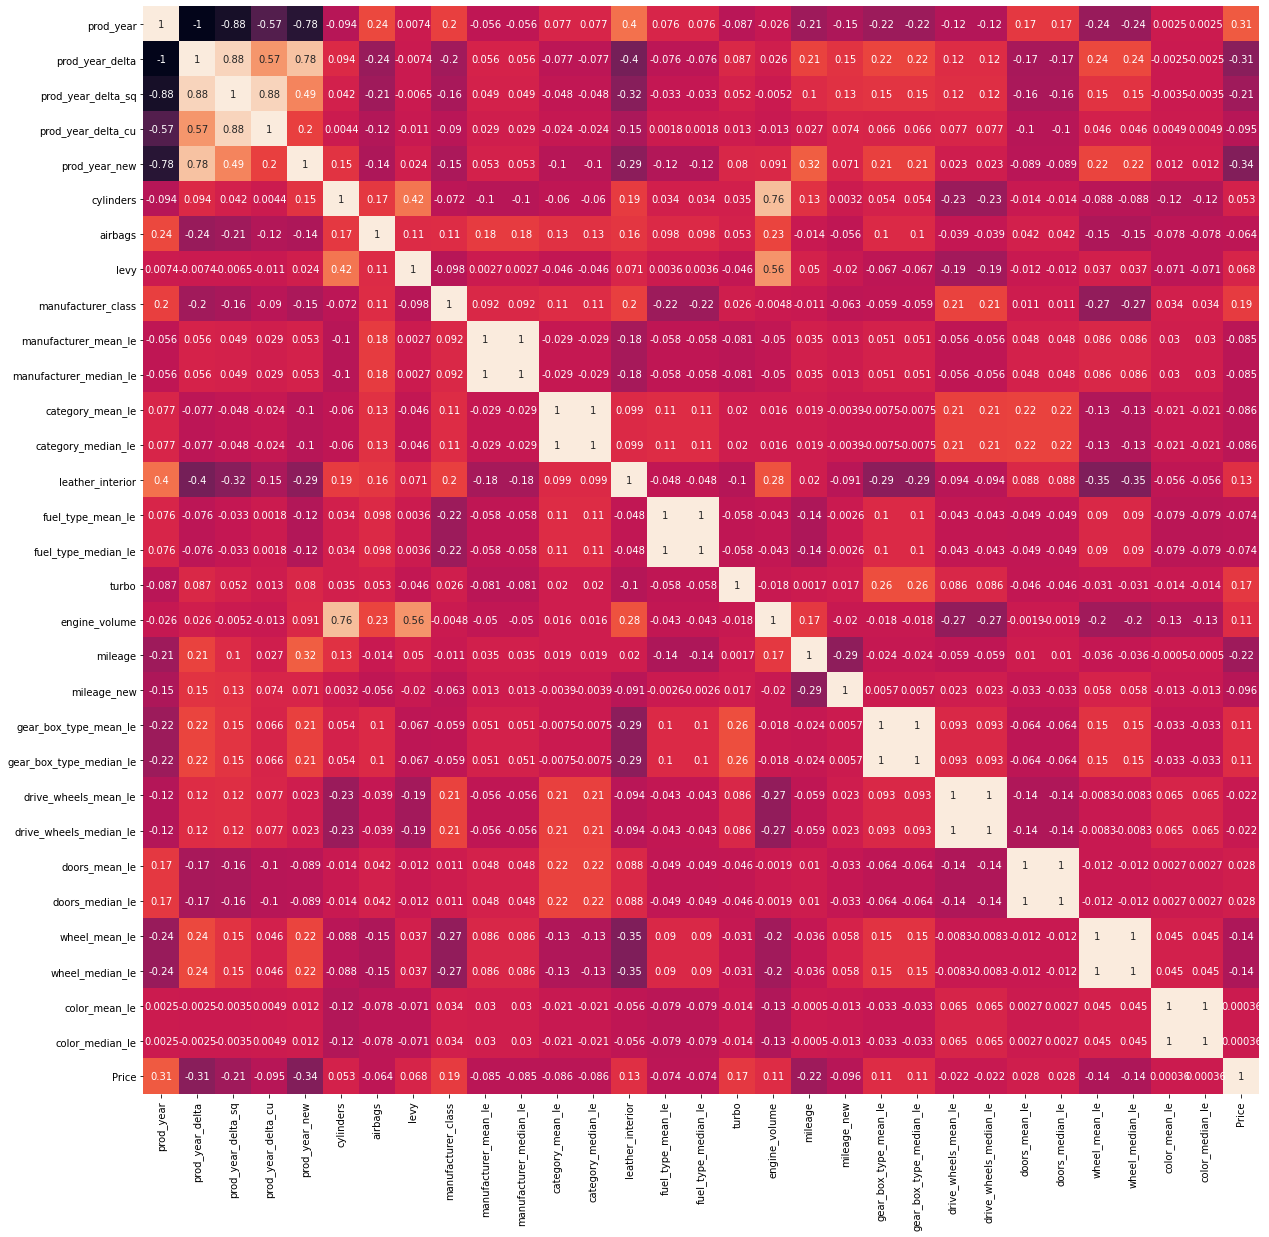

In [42]:
temp_df = pd.DataFrame(
    np.c_[
          train_features_df.to_numpy(), 
          train_targets["Price"].to_numpy()
        ],
    columns=list(train_features_df.columns) + ["Price"]
)

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(temp_df.corr(), annot=True, ax=ax, cbar=False)
plt.show()

# Exporting Datasets

In [43]:
# train_features_df.to_csv("train_features_df.csv", index=False)
# train_targets.to_csv("train_targets.csv", index=False)

# val_features_df.to_csv("val_features_df.csv", index=False)
# val_targets.to_csv("val_targets.csv", index=False)